In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv(r"C:\Users\cks12\Downloads\PML Project\dataset\raw\CleanDataset.csv")

In [46]:
df.corr()
X=df.drop(columns=['Unnamed: 0','EmployeeID','Age'],axis=1)
X

,Attrition,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,...,EducationField_Statistics,Gender_F,Gender_M,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single
0,0.0,5.0,69.0,1,1,1,1,1,1,20.0,...,0,0,1,0,1,0,0,0,1,0
1,1.0,5.0,62.0,4,3,2,0,8,0,20.0,...,1,1,0,0,1,0,0,0,0,1
2,0.0,5.0,45.0,5,3,2,1,3,0,26.0,...,1,1,0,0,0,1,0,0,0,1
3,0.0,10.0,32.0,3,2,4,1,1,0,23.0,...,1,1,0,0,0,1,0,0,0,0
4,0.0,27.0,49.0,3,4,4,1,8,0,21.0,...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5175,0.0,13.0,53.0,3,3,3,0,4,1,22.0,...,0,1,0,0,0,1,0,0,0,1
5176,0.0,9.0,66.0,1,4,4,1,9,0,23.0,...,0,1,0,0,1,0,0,0,0,1
5177,0.0,9.0,62.0,4,2,1,1,6,0,19.0,...,0,1,0,0,1,0,0,0,1,0
5178,0.0,26.0,61.0,3,4,3,0,1,0,28.0,...,1,1,0,0,1,0,0,0,0,0


In [47]:
y=df['Age']

In [48]:
y

0       35.0
1       32.0
2       31.0
3       34.0
4       37.0
        ... 
5175    36.0
5176    36.0
5177    29.0
5178    26.0
5179    36.0
Name: Age, Length: 5180, dtype: float64

In [39]:
y.describe()

count    5180.000000
mean       37.040927
std         8.965977
min        18.000000
25%        31.000000
50%        36.000000
75%        42.000000
max        61.000000
Name: Age, dtype: float64

In [51]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.2,random_state=43)

In [52]:
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [56]:
Xtest_scaled.shape

(1036, 33)

In [57]:
ytest.shape

(1036,)

In [70]:
Xtest_scaled.shape

(1036, 33)

In [72]:
Xtrain_scaled_m = np.hstack((np.ones_like(Xtrain_scaled[:,:1]), Xtrain_scaled))
Xtest_scaled_m = np.hstack((np.ones_like(Xtest_scaled[:,:1]), Xtest_scaled))
Xtrain_scaled_m.shape

(4144, 34)

In [61]:
w = np.linalg.solve(np.dot(Xtrain_scaled_m.T, Xtrain_scaled_m), np.dot(Xtrain_scaled_m.T, np.log(ytrain)))
print(w)

[ 3.58200201e+00 -2.00142799e-02  1.19154086e-03  9.42975393e-04
 -1.28873980e-03  3.10460542e-04 -1.93725385e-03 -3.29427527e-03
  3.25265928e-02  1.11272995e-02  6.18972080e-03  1.64487457e-01
  3.73500356e-03 -2.21086745e-02 -1.08292338e-02 -1.11824311e-03
  4.52944554e-04  5.37219417e-02  2.29768495e-02  4.53760978e-02
  1.06105724e-03  5.95304619e-03  1.86648016e-03  1.43472939e-02
  1.09806103e-02  3.85693903e-04  2.08403086e-03 -1.30232400e-02
 -1.46757192e-02 -1.03440659e-02 -3.88705811e-03 -1.03845879e-02
 -2.85043751e-03 -1.47037446e-02]


In [65]:
w.shape

(34,)

In [79]:
def predict(x, w):
    X_p = np.hstack((np.ones_like(x[:,:1]), x))
    return np.exp(np.dot(X_p ,w))

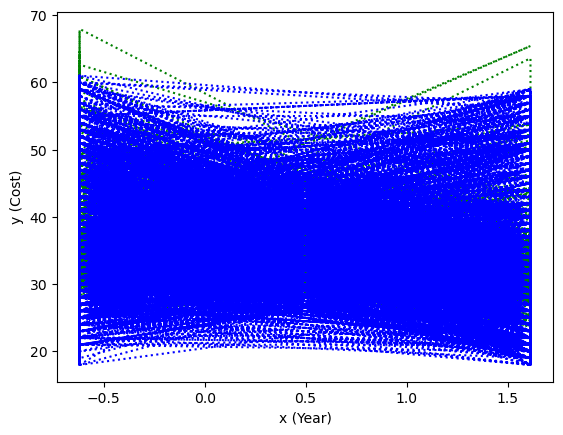

In [84]:
def plot_fit(x_test, y_test, x, y):
    plt.plot(x_test[:,:1], y_test, 'g:')
    plt.plot(x[:,:1], y, 'b:')
    plt.ylabel("y (Cost)")
    plt.xlabel("x (Year)")
    plt.show()


plot_fit(Xtest_scaled, predict(Xtest_scaled, w), Xtrain_scaled, ytrain)

In [83]:
def compute_RSS(x, y, w):
    return np.sqrt(np.mean((y - predict(x, w)) ** 2))
    

print(compute_RSS(Xtest_scaled, ytest,w))

6.400069586432237
